In [10]:
import ROOT as r
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import sys
import math
import glob

Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<std::vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 
Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 


Welcome to JupyROOT 6.26/11


In [2]:
def mass_to_float(s):
    """
    Converts a string of the form 'mXpY' into a float.
    
    Args:
        s (str): The input string in the format 'mXpY', where X and Y are digits.
    
    Returns:
        float: The corresponding float value.
    """
    if not s.startswith("m") or "p" not in s:
        raise ValueError("Input string must be in the format 'mXpY'.")

    # Extract parts
    integer_part = s[1:s.index("p")]  # Part after 'm' and before 'p'
    fractional_part = s[s.index("p") + 1:]  # Part after 'p'

    # Combine and convert to float
    return float(f"{integer_part}.{fractional_part}")

def charge_to_float(s):
    """
    Converts a string of the form 'mXpY' into a float.
    
    Args:
        s (str): The input string in the format 'mXpY', where X and Y are digits.
    
    Returns:
        float: The corresponding float value.
    """
    if not s.startswith("c") or "p" not in s:
        raise ValueError("Input string must be in the format 'cXpY'.")

    # Extract parts
    integer_part = s[1:s.index("p")]  # Part after 'm' and before 'p'
    fractional_part = s[s.index("p") + 1:]  # Part after 'p'

    # Combine and convert to float?
    return float(f"{integer_part}.{fractional_part}")

In [3]:
def dataframe_to_simple_latex_table(df):
    """
    Converts a pandas DataFrame to a clean LaTeX tabular format without the overhead of longtable.
    
    Parameters:
        df (pd.DataFrame): DataFrame to convert.

    Returns:
        str: Clean LaTeX tabular table as a string.
    """
    # Apply formatting for numeric columns
    formatted_df = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2e}")

    # Generate LaTeX tabular table
    latex_table = formatted_df.to_latex(
        index=False,  # Exclude row indices
        escape=False,  # Allow LaTeX syntax
        column_format="|".join(["c"] * len(df.columns)),  # Simple column alignment
        header=True  # Include headers
    )

    # Remove any unnecessary additional LaTeX formatting
    latex_table = latex_table.replace("\\begin{longtable}", "\\begin{tabular}")
    latex_table = latex_table.replace("\\end{longtable}", "\\end{tabular}")
    latex_table = latex_table.replace("\\endfirsthead", "")
    latex_table = latex_table.replace("\\endhead", "")
    latex_table = latex_table.replace("\\endfoot", "")
    latex_table = latex_table.replace("\\endlastfoot", "")
    latex_table = latex_table.replace("\\toprule", "\\hline")
    latex_table = latex_table.replace("\\midrule", "\\hline")
    latex_table = latex_table.replace("\\bottomrule", "\\hline")
    latex_table = latex_table.replace("\\\\\n", "")

    return latex_table

In [25]:
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_noFrontBackReq/'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_allowPanel20_requireFrontBack/'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR1_v2'

dataDir = '/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/'
#dataDir = '/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR1/'


df = pd.DataFrame(columns=['mass', 'charge', 'total', 'hitDetector', 'passing', 'weight'])

for filename in os.listdir(dataDir):
    if not filename.endswith('.root'): continue

    #for some reason os.listdir is appending this to the filenames...
    if filename.startswith('.sys.v#.'): filename = filename.replace('.sys.v#.', '')
        
    charge = filename.split('_')[-2].replace('.root', '')
    mass = filename.split('_')[-3]

    print(filename, mass, charge)

    inputFile = '/'.join([dataDir, filename])
    print(dataDir, filename, inputFile)
    fin = r.TFile.Open(inputFile, 'READ')

    cf = fin.Get('eventCutFlow')

    nbins = cf.GetNbinsX()
    total = cf.GetBinContent(1)
    hitDetector = cf.GetBinContent(2)
    passing = cf.GetBinContent(nbins)

    hweight = fin.Get('h_eventWeights')
    weight = hweight.GetBinContent(1)

    mass = mass_to_float(mass)
    charge = charge_to_float(charge)

    weight = weight*charge**2

    df.loc[len(df)] = [mass, charge, total, hitDetector, passing, weight]

    #if passing == 0: continue
    #print(mass, charge, total, passing)

    fin.Close()

df['ratio'] = df['passing']/df['total']
df['hitDetectorRatio'] = df['hitDetector']/df['total']
df['passingRatio'] = df['passing']/df['hitDetector']

print(df['passing'].sum(), df['total'].sum(), df['hitDetector'].sum())
    

bgCutFlow_signalSim_m4p5_c0p05_218.root m4p5 c0p05
/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/ bgCutFlow_signalSim_m4p5_c0p05_218.root /data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2//bgCutFlow_signalSim_m4p5_c0p05_218.root
bgCutFlow_signalSim_m0p4_c0p0043_284.root m0p4 c0p0043
/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/ bgCutFlow_signalSim_m0p4_c0p0043_284.root /data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2//bgCutFlow_signalSim_m0p4_c0p0043_284.root
bgCutFlow_signalSim_m0p7_c0p0053_231.root m0p7 c0p0053
/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/ bgCutFlow_signalSim_m0p7_c0p0053_231.root /data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2//bgCutFlow_signalSim_m0p7_c0p0053_231.root
bgCutFlow_signalSim_m9p0_c0p07_582.root m9p0 c0p07
/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/ bgCutFlow_signalSim_m9p0_c0p07_582.root /data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2//bgCutFlow_signalSim_m9p0_c0p07_582.root
bgCutFlow_signalSim_

In [26]:
df[df['mass']==25]

,mass,charge,total,hitDetector,passing,weight,ratio,hitDetectorRatio,passingRatio
36,25.0,0.095,2915.0,299.0,54.0,1.091782,0.018525,0.102573,0.180602
41,25.0,0.050,2915.0,285.0,63.0,0.352845,0.021612,0.097770,0.221053
55,25.0,0.060,2915.0,291.0,63.0,0.508095,0.021612,0.099828,0.216495
69,25.0,0.090,2915.0,292.0,54.0,0.979895,0.018525,0.100172,0.184932
165,25.0,0.080,2915.0,288.0,60.0,0.860250,0.020583,0.098799,0.208333
254,25.0,0.030,2915.0,283.0,56.0,0.112914,0.019211,0.097084,0.197880
272,25.0,0.093,2915.0,299.0,50.0,0.968770,0.017153,0.102573,0.167224
280,25.0,0.100,2915.0,295.0,51.0,1.142543,0.017496,0.101201,0.172881
288,25.0,0.070,2915.0,289.0,54.0,0.592788,0.018525,0.099142,0.186851
499,25.0,0.040,2915.0,287.0,59.0,0.211490,0.020240,0.098456,0.205575


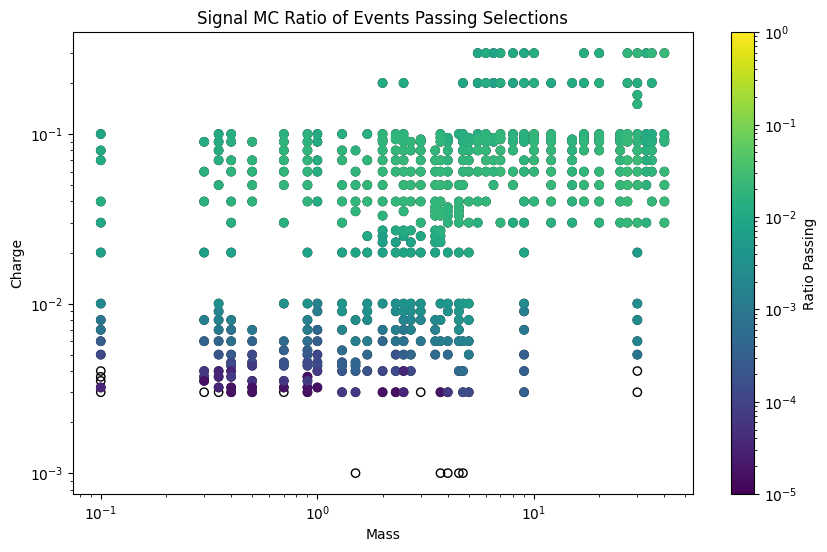

In [27]:
# Sample data (replace with your actual DataFrame)
weights = df['ratio'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
norm = colors.LogNorm(vmin=1e-5, vmax=1)

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], marker='o', facecolors='none', edgecolors='black')
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=norm)

# Add a color bar
plt.colorbar(label='Ratio Passing')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Ratio of Events Passing Selections')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


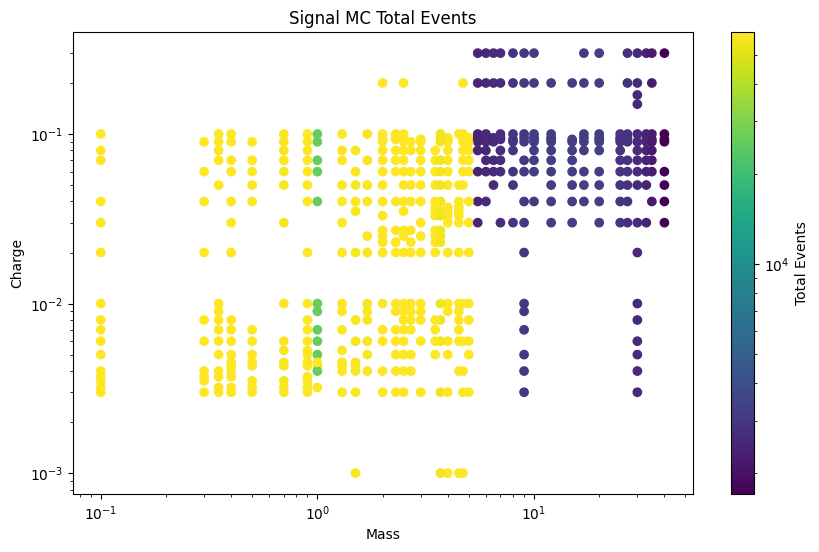

In [28]:
# Sample data (replace with your actual DataFrame)
weights = df['total'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Total Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Total Events')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


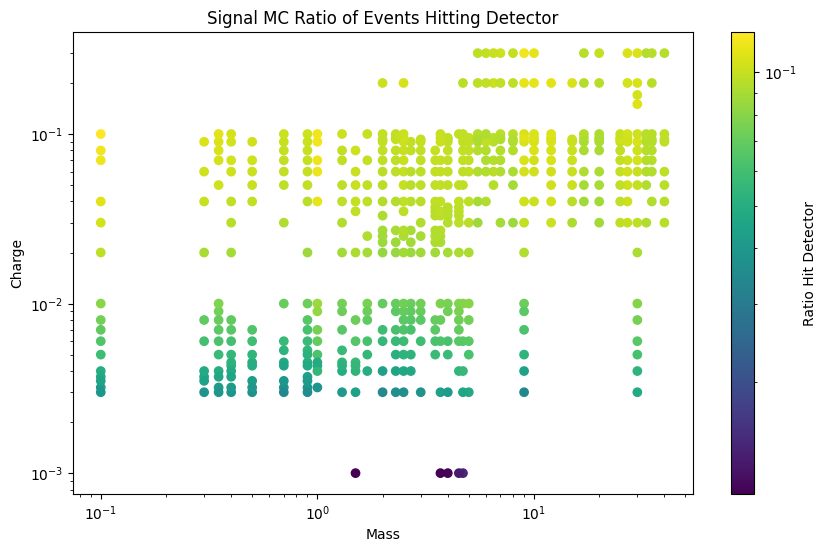

In [29]:
# Sample data (replace with your actual DataFrame)
weights = df['hitDetectorRatio'].to_numpy()

# Normalize weights for colormap
norm = colors.LogNorm(vmin=np.nanmin(weights), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=norm)

# Add a color bar
plt.colorbar(label='Ratio Hit Detector')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Ratio of Events Hitting Detector')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


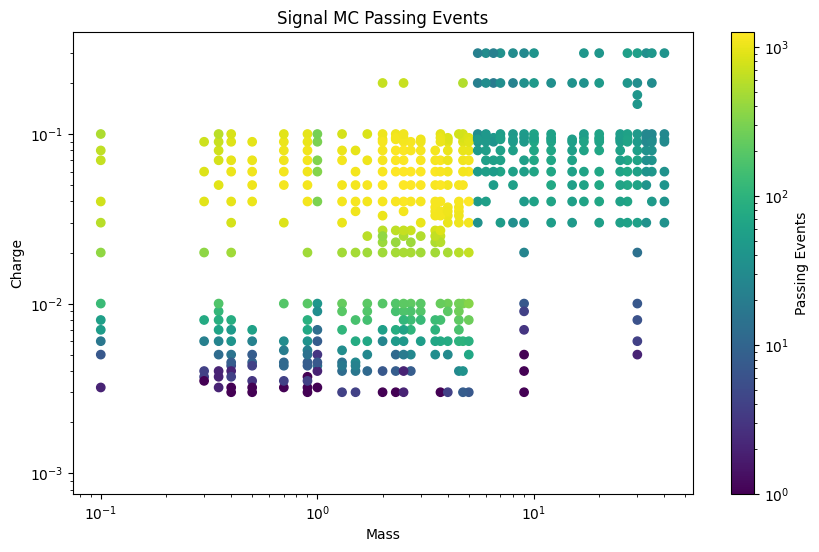

In [30]:
# Sample data (replace with your actual DataFrame)
weights = df['passing'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Passing Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Passing Events')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


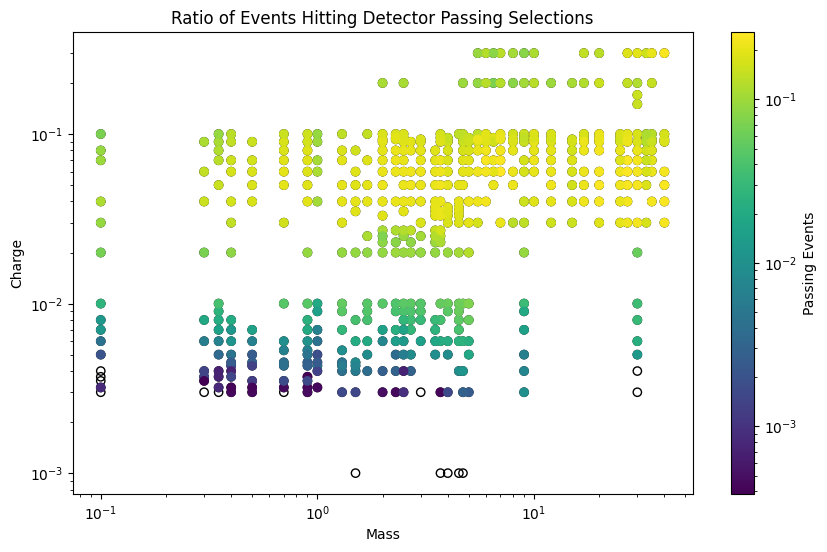

In [31]:
# Sample data (replace with your actual DataFrame)
weights = df['passingRatio'].to_numpy()
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], marker='o', facecolors='none', edgecolors='black')
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Passing Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Ratio of Events Hitting Detector Passing Selections')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


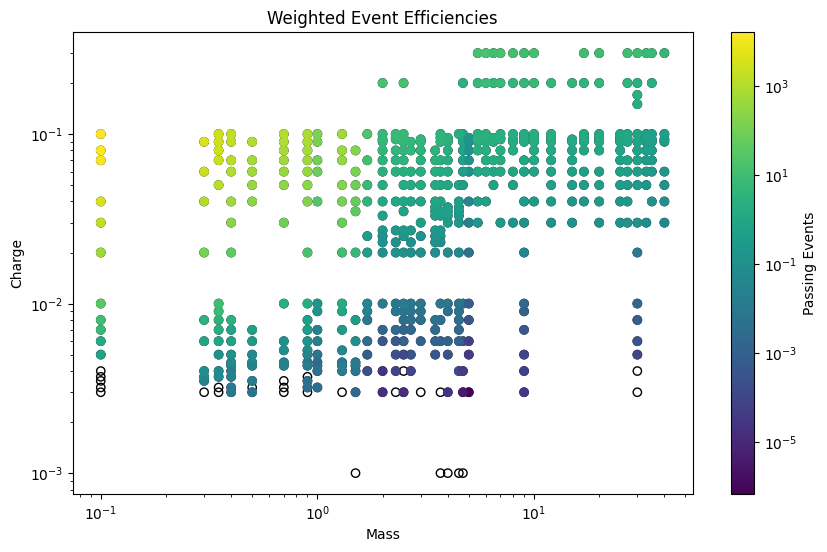

In [32]:
# Sample data (replace with your actual DataFrame)
weights = df['weight'].to_numpy()
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], marker='o', facecolors='none', edgecolors='black')
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Passing Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Weighted Event Efficiencies')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


In [29]:
c1 = r.TCanvas("c1", "c1", 800, 600)

#dataDir = '/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/'
dataDir = '/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR1/'
'''f_names = ['bgCutFlow_signalSim_m2p0_c0p033_*.root', 
            'bgCutFlow_signalSim_m10p0_c0p04_*.root', 
            'bgCutFlow_signalSim_m30p0_c0p2_*.root', 
            'bgCutFlow_signalSim_m25p0_c0p1_*.root']''' #good for SR2

f_names = ['bgCutFlow_signalSim_m0p4_c0p003_*.root', 
            'bgCutFlow_signalSim_m2p0_c0p003_*.root',
            'bgCutFlow_signalSim_m9p0_c0p004_*.root', 
            'bgCutFlow_signalSim_m30p0_c0p01_*.root'] #good for SR1

names = ['-'.join(x.split('_')[2:4]) for x in f_names]

colors = [r.kBlack, r.kBlue, r.kRed, r.kGreen, r.kMagenta, r.kCyan]

files = []
eventCutFlows = []
eventCutFlowsScaled = []
eventCutFlowEff = []
pulseCutFlows = []
panelHits = []
panelArea = []
allLayerEff = []
selEff = []

for f in f_names:
    fname = glob.glob('/'.join([dataDir,f]))[0]

    fin = r.TFile.Open(fname, 'READ')

    h = fin.Get('eventCutFlow').Clone()
    h.SetDirectory(0)
    hEff = fin.Get('eventCutEfficiencies').Clone()
    hEff.SetDirectory(0)
    h2 = fin.Get('pulseCutFlow').Clone()
    h2.SetDirectory(0)

    hPanelArea = fin.Get('h_panelNPEBefore').Clone()
    hPanelArea.SetDirectory(0)
    hPanelHits = fin.Get('h_panelHitsBefore').Clone()
    hPanelHits.SetDirectory(0)

    hScaled = h.Clone()
    hScaled.SetDirectory(0)
    hScaled.Scale(1/hScaled.GetBinContent(1))

    hAllLayer = fin.Get('eventCutEffAllLayers').Clone()
    hAllLayer.SetDirectory(0)

    sEff = fin.Get('eventSelectionEff').Clone()
    sEff.SetDirectory(0)

    eventCutFlowsScaled.append(hScaled)
    eventCutFlows.append(h)
    pulseCutFlows.append(h2)
    eventCutFlowEff.append(hEff)
    panelHits.append(hPanelHits)
    panelArea.append(hPanelArea)
    allLayerEff.append(hAllLayer)
    selEff.append(sEff)

    fin.Close()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


TFile**		/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/bgCutFlow_signalSim_m25p0_c0p1_712.root	
 TFile*		/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/bgCutFlow_signalSim_m25p0_c0p1_712.root	
  KEY: TH1F	h_timeDiff1;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff2;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff3;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff4;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff5;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff6;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff7;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff8;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_timeDiff9;1	Layer 3 and 0 Time Difference
  KEY: TH1F	h_nBars;1	Number of Bars per Event
  KEY: TH1F	h_nLayersBeforeAllLayers;1	Number of Layers Hit Before N Layers Cut
  KEY: TH1F	h_nLayersAfterAllLayers;1	Number of Layers Hit After N Layers Cut
  KEY: TH1F	h_nHitsPerLayerBefore;1	Number of Hits Per Layer Before All Layers Hit 

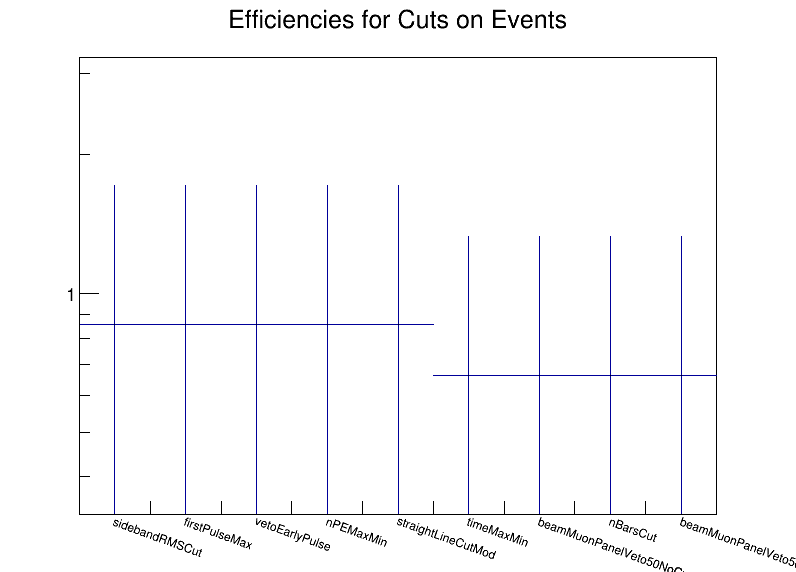

In [21]:
fin = r.TFile.Open('/data/user/mcarrigan/milliqan/bgCutFlow_signalSim_SR2/bgCutFlow_signalSim_m25p0_c0p1_712.root')
fin.ls()
h = fin.Get('eventCutEffAllLayers')
h.Draw()
c1.Draw()

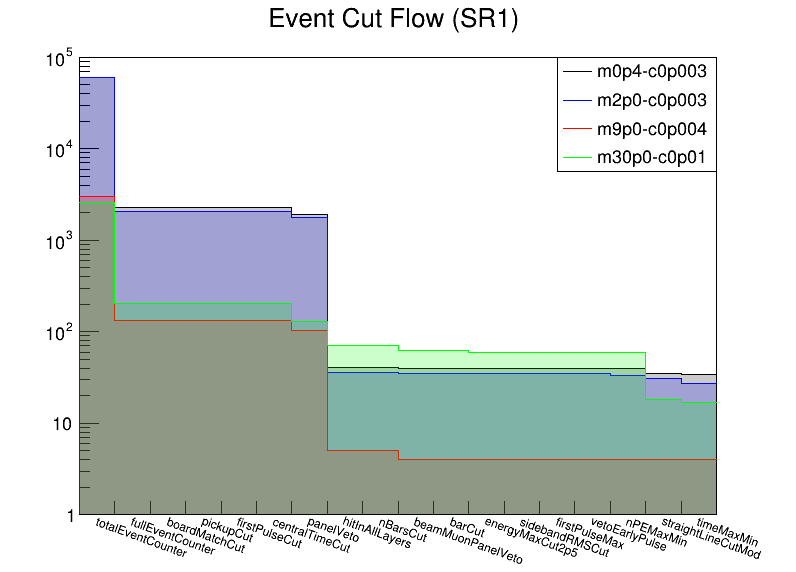

In [32]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(eventCutFlows):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Event Cut Flow (SR1)")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 1e5)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

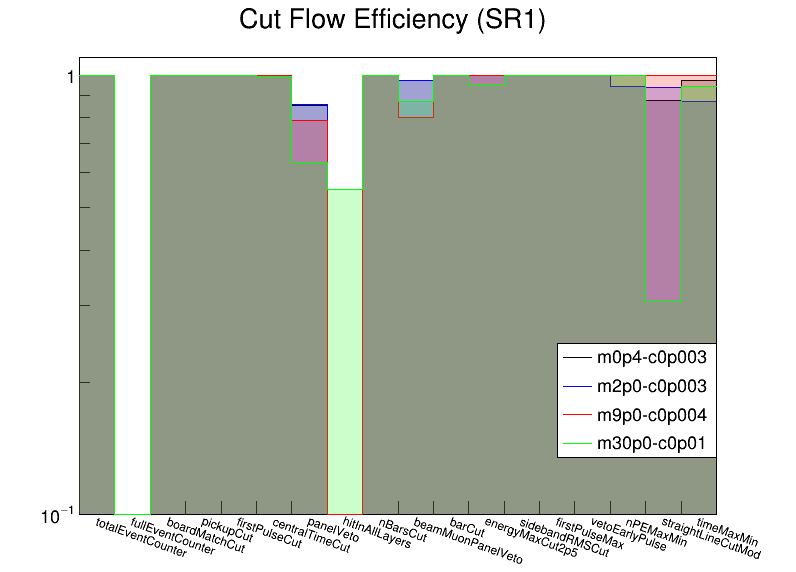

In [33]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.2, 0.9, 0.4)

for i, h in enumerate(selEff):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Cut Flow Efficiency (SR1)")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1e-1, 1.1)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

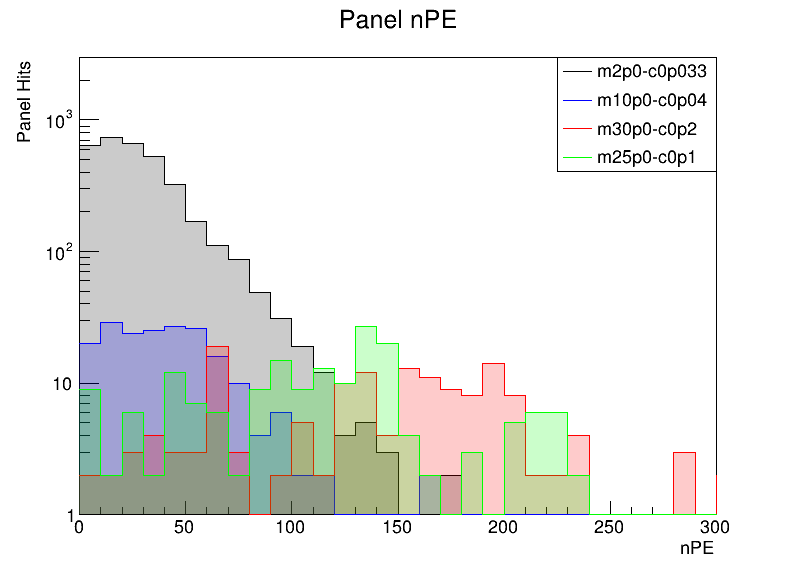

In [15]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(panelArea):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Panel nPE")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 3e3)
        h.GetXaxis().SetRangeUser(0, 300)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

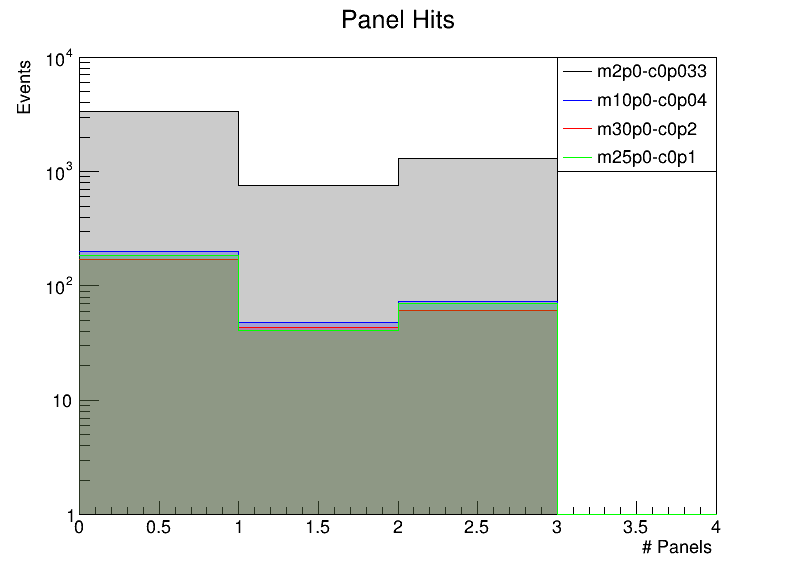

In [16]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(panelHits):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Panel Hits")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 1e4)
        h.GetXaxis().SetRangeUser(0, 4)

    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

In [ ]:
# plot signal cutflows together

c1 = r.TCanvas("c1", "c1", 800, 600)

dataDir = '/eos/user/m/micarrig/milliqan/signalCutFlows/fourLayerCutFlow/'
f_c0p001_m1p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p001_m1p0.root']), 'READ')
f_c0p005_m0p1 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p005_m0p1.root']), 'READ')
f_c0p01_m9p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p01_m9p0.root']), 'READ')
f_c0p1_m30p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p1_m30p0.root']), 'READ')

h_c0p001_m1p0 = f_c0p001_m1p0.Get('eventCutFlow')
h_c0p005_m0p1 = f_c0p005_m0p1.Get('eventCutFlow')
h_c0p01_m9p0 = f_c0p01_m9p0.Get('eventCutFlow')
h_c0p1_m30p0 = f_c0p1_m30p0.Get('eventCutFlow')

h_c0p001_m1p0 = f_c0p001_m1p0.Get('pulseCutFlow')
h_c0p005_m0p1 = f_c0p005_m0p1.Get('pulseCutFlow')
h_c0p01_m9p0 = f_c0p01_m9p0.Get('pulseCutFlow')
h_c0p1_m30p0 = f_c0p1_m30p0.Get('pulseCutFlow')

In [ ]:
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_allowPanel20_requireFrontBack/

In [ ]:
r.gStyle.SetOptStat(0)

h_c0p001_m1p0.SetTitle("Signal MC Pulse Cuflow")
h_c0p001_m1p0.GetYaxis().SetTitle("Pulses")
h_c0p001_m1p0.GetYaxis().SetRangeUser(1e-1, 4e4)
h_c0p001_m1p0.Draw("hist")
h_c0p001_m1p0.SetFillColorAlpha(r.kBlue, 0.1)

h_c0p005_m0p1.SetLineColor(r.kRed)
h_c0p005_m0p1.SetFillColorAlpha(r.kRed, 0.1)
h_c0p005_m0p1.Draw("same hist")

h_c0p01_m9p0.SetLineColor(r.kBlack)
h_c0p01_m9p0.SetFillColorAlpha(r.kBlack, 0.1)
h_c0p01_m9p0.Draw("same hist")

h_c0p1_m30p0.SetLineColor(r.kGreen)
h_c0p1_m30p0.SetFillColorAlpha(r.kGreen, 0.1)
h_c0p1_m30p0.Draw("same hist")

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_c0p001_m1p0, '1 GeV, 0.001 q/e', 'l')
l1.AddEntry(h_c0p005_m0p1, '0.1 GeV, 0.005 q/e', 'l')
l1.AddEntry(h_c0p01_m9p0, '9 GeV, 0.01 q/e', 'l')
l1.AddEntry(h_c0p1_m30p0, '30 GeV, 0.1 q/e', 'l')
l1.Draw()

c1.Draw()
c1.SetLogy()

In [ ]:
myfile1 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p005_m0p1.root')
myfile2 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p1_m30p0.root')

mytree1 = myfile1.Get('t')
mytree2 = myfile2.Get('t')

print(mytree.GetEntries())
#mytree.Draw("ipulse:height", "!pickupFlagTight && timeFit_module_calibrated < 1400 && timeFit_module_calibrated > 1100", "colz")
mytree1.Draw("sidebandRMS>>h1()", "Length$(height) >= 4")
mytree2.Draw("sidebandRMS>>h2()", "Length$(height) >= 4", "same")

h1 = r.gPad.GetPrimitive("h1")
h2 = r.gPad.GetPrimitive("h2")

h1.Scale(1/mytree1.GetEntries())
h2.Scale(1/mytree2.GetEntries())

h1.SetTitle("Max Sideband RMS in Events with 4 Pulses")
h1.GetXaxis().SetTitle("Sideband RMS")
h1.GetYaxis().SetTitle("Events")
h1.Draw('hist')
h2.SetLineColor(r.kRed)
h2.Draw("same hist")

l1 = r.TLegend(0.6, 0.6, 0.8, 0.8)
l1.AddEntry(h1, "q=0.005, m=0.1 GeV", "l")
l1.AddEntry(h2, "q=0.1, m=30.0 GeV", "l")
l1.Draw()
c1.Draw()

In [ ]:
myfile1 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p005_m0p1.root')
myfile2 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p1_m30p0.root')

mytree1 = myfile1.Get('t')
mytree2 = myfile2.Get('t')

print(mytree.GetEntries())
#mytree.Draw("ipulse:height", "!pickupFlagTight && timeFit_module_calibrated < 1400 && timeFit_module_calibrated > 1100", "colz")
mytree1.Draw("Max$(npulses)>>h1(30, 0, 30)", "")
mytree2.Draw("Max$(npulses)>>h2(30, 0, 30)", "", "same")

h1 = r.gPad.GetPrimitive("h1")
h2 = r.gPad.GetPrimitive("h2")

h1.Scale(1/mytree1.GetEntries())
h2.Scale(1/mytree2.GetEntries())

h1.SetTitle('Number of Pulses Per Event')
h1.GetXaxis().SetTitle('Pulses')
h1.GetYaxis().SetTitle('Events Normalized')
h1.Draw("hist")
h2.Draw("same hist")
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.6, 0.6, 0.8, 0.8)
l1.AddEntry(h1, "q=0.005, m=0.1 GeV", "l")
l1.AddEntry(h2, "q=0.1, m=30.0 GeV", "l")
l1.Draw()
c1.Draw()

In [ ]:
totalEvents = 0
fullEvents = 0
passingEvents = 0
for ievent, evt in enumerate(mytree):
    if ievent %5000 == 0: print("Working on event", ievent)
    totalEvents += 1
    if len(evt.layer) >0: fullEvents+=1
    this_layer = np.array(evt.layer)
    this_type = np.array(evt.type)
    this_layer = this_layer[this_type == 0]
    if len(np.unique(this_layer)) > 3: passingEvents+=1
    #if ievent > 500: break
    #print(type(evt.layer), len(evt.layer), evt.layer)

print("Total Events {}, full events {}, passing events {}".format(totalEvents, fullEvents, passingEvents))

In [ ]:
#compare data to simulation cut flows
signalDir = '/eos/user/m/micarrig/milliqan/signalCutFlows/'
f_sim = r.TFile.Open('/'.join([signalDir, 'bgCutFlow_c0p005_m0p1.root']), 'READ')
h_sim = f_sim.Get('eventCutFlow')

f_data = r.TFile.Open('bgCutFlow_Full.root', 'READ')
h_data = f_data.Get('eventCutFlow')

n_data = h_data.GetBinContent(8)
n_sim = h_sim.GetBinContent(8)

h_data.Scale(n_sim/n_data)



In [ ]:
h_sim.SetTitle("Sim vs Data Cut Flow")
h_sim.GetYaxis().SetTitle("Events")
h_sim.Draw("hist")
h_sim.SetLineColor(r.kRed)
h_sim.SetFillColorAlpha(r.kRed, 0.1)
h_sim.GetYaxis().SetRangeUser(0.1, 5e4)
h_data.Draw("hist same")
h_data.SetFillColorAlpha(r.kBlue, 0.1)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_sim, 'Sim 0.1GeV 0.005 q/e', 'l')
l1.AddEntry(h_data, 'Data', 'l')
l1.Draw()


c1.Draw()

In [ ]:
fin = r.TFile.Open('bgCutFlow_LooseNPE7.root', 'READ')
c1 = r.TCanvas("c1", "c1", 800, 600)
h_ABCD = fin.Get('h_ABCD')
r.gStyle.SetOptStat(0)
h_ABCD.Draw()
c1.Draw()
print(h_ABCD.GetEntries())

h_timeDiff = fin.Get('h_timeDiff')
h_timeDiffPlot = fin.Get('h_timeDiffPlot')

In [ ]:
h_ABCD.Draw("colz")
c1.Draw()

yval = h_ABCD.GetYaxis().FindFixBin(20)
xval = h_ABCD.GetXaxis().FindFixBin(1)

x_low = 0
x_high = h_ABCD.GetNbinsX()

y_low = 0
y_high = h_ABCD.GetNbinsY()
#y_high = h_ABCD.GetYaxis().FindFixBin(100)

lx = r.TLine(x_low, h_ABCD.GetYaxis().GetBinLowEdge(yval+1), h_ABCD.GetXaxis().GetBinLowEdge(x_high+1), h_ABCD.GetYaxis().GetBinLowEdge(yval))
ly = r.TLine(h_ABCD.GetXaxis().GetBinLowEdge(xval), y_low, h_ABCD.GetXaxis().GetBinLowEdge(xval), h_ABCD.GetYaxis().GetBinLowEdge(y_high+1))
lx.SetLineColor(r.kRed)
ly.SetLineColor(r.kRed)
lx.SetLineStyle(7)
ly.SetLineStyle(7)

lx.Draw("same")
ly.Draw("same")

A = h_ABCD.Integral(xval, x_high+1, y_low, yval-1)
B = h_ABCD.Integral(x_low, xval-1, y_low, yval-1)
C = h_ABCD.Integral(x_low, xval-1, yval, y_high+1)
D = h_ABCD.Integral(xval, x_high+1, yval, y_high+1)

err_A = np.sqrt(A)
err_B = np.sqrt(B)
err_C = np.sqrt(C)
err_D = np.sqrt(D)

t_a = r.TLatex()
t_b = r.TLatex()
t_c = r.TLatex()
t_d = r.TLatex()
t_a.SetTextColor(r.kRed)
t_b.SetTextColor(r.kRed)
t_c.SetTextColor(r.kRed)
t_d.SetTextColor(r.kRed)
t_a.DrawLatex(1.4, 2, f"A={A}")
t_b.DrawLatex(0.2, 2, f"B={B}")
t_c.DrawLatex(0.2, 60, f"C={C}")
t_d.DrawLatex(1.4, 60, f"D={D}")

if B == 0: B=1
if C == 0: C=1
if D == 0: D=1

estErrA = (B*D)/C*np.sqrt(1/B + 1/D + 1/C)
print("Estimated error on A", estErrA, (B*D)/C, np.sqrt(1/B + 1/D + 1/C))
estErrA = round(estErrA, 2)
a_est = round(B*D/C, 2)

#output = 'A = #frac{BD}{C} = #frac{' + str(B) + '#times' + str(D) + '}{'+ str(C) + '} = ' + str(a_est) + '#pm ' + str(estErrA)
output = 'A = #frac{BD}{C} = #frac{' + str(B) + '#times' + str(D) + '}{'+ str(C) + '} = ' + str(a_est) + '#pm ' + str(round(np.sqrt(a_est), 2)) + '#pm ' + str(estErrA)

t_results = r.TLatex()
t_results.SetTextSize(0.03)
t_results.SetTextColor(r.kRed)
t_results.DrawLatex(1., 10, output)


c1.SetLogy(1)

nBinsX = h_ABCD.GetNbinsX()
nBinsY = h_ABCD.GetNbinsY()



In [ ]:
c2 = r.TCanvas("c2", "c2", 1200, 600)
c2.Divide(2, 1)
c2.cd(1)
h_ABCD.GetXaxis().SetRangeUser(1, 2)
h_ABCD.GetYaxis().SetRangeUser(0, 40)
h_ABCD.Draw("colz text")
#h_timeDiff.Draw()
#h_timeDiff.GetXaxis().SetRangeUser(0, 40)
c2.cd(2)
h_timeDiff.Draw()
h_timeDiff.GetXaxis().SetRangeUser(0, 40)
c2.Draw()


In [ ]:
#plot the max-min times for straight and non-straight paths

h_straight = r.TH1F('h_straight', 'Max-Min Time Straight Paths', 300, 0, 300)
h_notStraight = r.TH1F('h_notStraight', 'Max-Min Time Non-Straight Paths', 300, 0, 300)

for ybin in range(h_ABCD.GetNbinsY()):
    s = h_ABCD.GetBinContent(2, ybin+1)
    ns = h_ABCD.GetBinContent(1, ybin+1)
    h_straight.SetBinContent(ybin+1, s)
    h_notStraight.SetBinContent(ybin+1, ns)

s_count = h_straight.Integral()
ns_count = h_notStraight.Integral()
print(s_count, ns_count)
h_notStraight.Scale(s_count/ns_count)

h_notStraight.SetTitle('Max-Min Time;dT (ns); Events Scaled')
h_notStraight.Draw('hist')
h_notStraight.SetLineColor(r.kRed)
h_straight.Draw("same")


l1 = r.TLegend(0.6, 0.7, 0.8, 0.9)
l1.AddEntry(h_straight, 'Straight Paths', 'l')
l1.AddEntry(h_notStraight, 'Non-Straight Paths', 'l')
l1.Draw()

c1.Draw()

In [ ]:
def calculateABCD(h_ABCD, maxTime=20):
    
    yval = h_ABCD.GetYaxis().FindFixBin(maxTime)
    xval = h_ABCD.GetXaxis().FindFixBin(1)
    
    x_low = 0
    x_high = h_ABCD.GetNbinsX()
    
    y_low = 0
    y_high = h_ABCD.GetNbinsY()
    
    A = h_ABCD.Integral(xval, x_high+1, y_low, yval-1)
    B = h_ABCD.Integral(x_low, xval-1, y_low, yval-1)
    C = h_ABCD.Integral(x_low, xval-1, yval, y_high+1)
    D = h_ABCD.Integral(xval, x_high+1, yval, y_high+1)
    print(f'A {A} B {B} C {C} D {D}') 
    
    err_A = np.sqrt(A)
    err_B = np.sqrt(B)
    err_C = np.sqrt(C)
    err_D = np.sqrt(D)

    if B==0: B=1
    if C==0: C=1
    if D==0: D=1

    estA = round(B*D/C, 2)
    
    estErrA = (B*D)/C*np.sqrt(1/B + 1/D + 1/C)
    estErrA = round(estErrA, 2)

    return A, estA, estErrA

In [ ]:
c3 = r.TCanvas("c3", "c3", 800, 800)
c3.cd()

# Define the upper pad (larger)
upper_pad = r.TPad("upper_pad", "Upper Pad", 0.0, 0.45, 1.0, 1.0)  # xlow, ylow, xup, yup
upper_pad.SetBottomMargin(0.1)  # Reduce bottom margin
upper_pad.Draw()

# Define the lower pad (smaller)
lower_pad = r.TPad("lower_pad", "Lower Pad", 0.0, 0.0, 1.0, 0.4)  # xlow, ylow, xup, yup
lower_pad.SetTopMargin(0.1)    # Reduce top margin
lower_pad.SetBottomMargin(0.3) # Increase bottom margin for labels
lower_pad.Draw()

In [ ]:
max=0
g_ABCDLoose = r.TGraphErrors()
g_ABCDNPE = r.TGraphErrors()
g_ABCD = r.TGraphErrors()

g_ABCD.SetTitle("ABCD Measured vs Estimated;Measured;Estimated")
h_sigma = r.TH1F('h_sigma', '#sigma ABCD;#sigma(Estimate-Measured);', 50, -5, 5)
for i, filename in enumerate(os.listdir()):
    if not filename.endswith('root') or not filename.startswith('bgCutFlow'): continue

    fin = r.TFile.Open(filename)
    h_ABCD = fin.Get('h_ABCD')
    A, estA, estErrA = calculateABCD(h_ABCD)
    if "LooseNPE" in filename:
        g_ABCDNPE.SetPoint(i, A, estA)
        g_ABCDNPE.SetPointError(i, np.sqrt(A), estErrA)
    elif "Loose" in filename:
        g_ABCDLoose.SetPoint(i, A, estA)
        g_ABCDLoose.SetPointError(i, np.sqrt(A), estErrA)
    else:
        g_ABCD.SetPoint(i, A, estA)
        g_ABCD.SetPointError(i, np.sqrt(A), estErrA)
    diff = estErrA - A
    fin.Close()
    if estErrA == 0:
        sigma = 0
    else:
        sigma = diff/estErrA
    sigma = round(sigma, 2)
    h_sigma.Fill(sigma)
    print(f'file {filename}, A: {A}+-{round(np.sqrt(A), 2)}, estA: {estA}+-{estErrA}, sigma: {sigma}')
    if A > max: max = A
    if estA > max: max = estA

In [ ]:
c3.Clear()
upper_pad = r.TPad("upper_pad", "Upper Pad", 0.0, 0.3, 1.0, 1.0)  # xlow, ylow, xup, yup
upper_pad.SetBottomMargin(0.1)  # Reduce bottom margin
upper_pad.Draw()

# Define the lower pad (smaller)
lower_pad = r.TPad("lower_pad", "Lower Pad", 0.0, 0.0, 1.0, 0.3)  # xlow, ylow, xup, yup
lower_pad.SetTopMargin(0.1)    # Reduce top margin
lower_pad.SetBottomMargin(0.15) # Increase bottom margin for labels
lower_pad.Draw()
    
max = math.ceil(max*1.1)
r.gStyle.SetOptStat(0)
upper_pad.cd()
upper_pad.SetLogx(0)
upper_pad.SetLogy(0)
g_ABCD.Draw("AP")
g_ABCD.SetMaximum(max)
g_ABCD.SetMinimum(-1)
g_ABCD.GetXaxis().SetLimits(-1, max)
g_ABCDLoose.SetLineColor(r.kRed)
g_ABCDNPE.SetLineColor(r.kBlue)
g_ABCDLoose.Draw("same P")
g_ABCDNPE.Draw("same P")
l1 = r.TLine(0, 0, max, max)
l1.SetLineColor(r.kGreen)
l1.SetLineStyle(10)
l1.Draw("same")
lower_pad.cd()
h_sigma.Draw()
c3.Draw()


In [ ]:
c3.Draw()

In [ ]:
fin_default = r.TFile.Open('bgCutFlow_Full.root', 'READ')
fin_nbars = r.TFile.Open('bgCutFlow_NM_nBars.root', 'READ')
fin_sideband = r.TFile.Open('bgCutFlow_NM_sidebandRMS.root', 'READ')
fin_nPEMaxMin = r.TFile.Open('bgCutFlow_NM_nPEMaxMin.root', 'READ')
fin_timeMaxMin = r.TFile.Open('bgCutFlow_NM_timeMaxMin.root', 'READ')
fin_frontBackPanel = r.TFile.Open('bgCutFlow_NM_frontBackPanel.root', 'READ')

h_default = fin_default.Get('eventCutFlow')
h_nbars = fin_nbars.Get('eventCutFlow')
h_sideband = fin_sideband.Get('eventCutFlow')
h_nPEMaxMin = fin_nPEMaxMin.Get('eventCutFlow')
h_timeMaxMin = fin_timeMaxMin.Get('eventCutFlow')
h_frontBackPanel = fin_frontBackPanel.Get('eventCutFlow')

In [ ]:
c_default = h_default.GetBinContent(h_default.GetNbinsX())
c_nbars = h_nbars.GetBinContent(h_nbars.GetNbinsX())
c_sideband = h_sideband.GetBinContent(h_sideband.GetNbinsX())
c_nPE = h_nPEMaxMin.GetBinContent(h_nPEMaxMin.GetNbinsX())
c_time = h_timeMaxMin.GetBinContent(h_timeMaxMin.GetNbinsX())
c_panel = h_frontBackPanel.GetBinContent(h_frontBackPanel.GetNbinsX())

print(c_default, c_nbars, c_sideband, c_nPE, c_time, c_panel)

In [ ]:
#before/after cuts
fin = r.TFile.Open('bgCutFlow_Full.root', 'READ')
c1 = r.TCanvas("c1", "c1", 800, 600)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nBarsBeforeCut')
h1.SetTitle('Number of Bars Before/After nBars Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_nBarsAfterCut')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_sidebandsBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_sidebandsAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)


In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_panelNPEBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_panelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:

r.gStyle.SetOptStat(0)
h1 = fin.Get('h_panelHitsBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_panelHitsAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_frontPanelNPEBefore')
h1.SetTitle('nPE of Front Panel Before/After Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_frontPanelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.5, 0.6, 0.7, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy()
c1.SetLogx(0)

In [ ]:


r.gStyle.SetOptStat(0)
h1 = fin.Get('h_backPanelNPEBefore')
h1.SetTitle('nPE of Back Panel Before/After Cut')

#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_backPanelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy()
c1.SetLogx(0)

In [ ]:
c1.Clear()
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightChannelBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h1.GetYaxis().SetRangeUser(1e-1, 100)
h2 = fin.Get('h_straightChannelAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.8, 0.9, 0.9)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_maxNPEBefore')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_maxNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_minNPEBefore')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_minNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_maxTimeBefore')
h1.SetTitle('Max Pulse Time Before/After Time Max-Min Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1400)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_maxTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_minTimeBefore')
h1.SetTitle('Min Pulse Time Before/After Time Max-Min Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1400)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_minTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nPEBefore')
h1.SetTitle('Max/Min NPE Before Cut')

h1.GetXaxis().SetRangeUser(0, 50)
h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(1)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nPEAfter')
h1.SetTitle('Max/Min NPE After Cut')

h1.GetXaxis().SetRangeUser(0, 50)
h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(1)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeAfter')
h1.SetTitle('Max-Min Time After Cut')

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeBefore')
h1.SetTitle('Max-Min Time Before Cut')

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeDiff')
h1.SetTitle('Max-Min Time After Cut')
h1.Scale(1/4)

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("hist")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightChannelBefore')
h1.SetTitle('Channels Before/After Straight Line Cut')
h1.GetYaxis().SetRangeUser(1e-1, 100)
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightChannelAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightHeightBefore')
h1.SetTitle('Height Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightHeightAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.1, 0.6, 0.2, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(1)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightNPEBefore')
h1.SetTitle('nPE Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightTimeBefore')
h1.SetTitle('Times Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1500)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightNumPaths')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
#h2 = fin.Get('h_straightNumPaths')
#h2.SetFillColor(r.kRed)
#h2.SetFillColorAlpha(r.kRed, 0.4)
#h2.SetLineColor(r.kRed)

#l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
#l1.AddEntry(h1, 'Before', 'l')
#l1.AddEntry(h2, 'After', 'l')

h1.Draw()
#h2.Draw("same")
#l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

# Plot NPE Before/After Straight Line Cut

Investigating reason that nPECut is necessary

In [ ]:
fin = r.TFile.Open('bgCutFlow_Loose.root')
h_before = fin.Get('h_straightNPEBefore')
h_after = fin.Get('h_straightNPEAfter')

c1 = r.TCanvas("c1", "c1", 800, 600)

h_before.SetTitle('NPE Before/After Straight Line Cut;nPE;Pulses')
h_before.Draw()
h_after.SetLineColor(r.kRed)
h_after.Draw("same")

l1 = r.TLegend(0.7, 0.6, 0.9, 0.8)
l1.AddEntry(h_before, 'Before Straight Cut', 'l')
l1.AddEntry(h_after, 'After Straight Cut', 'l')
l1.Draw()
c1.Draw()
c1.SetLogy()

In [8]:
ls ../../../../../pulse_injection/test_globalEvent.root

MilliDAQ/
MilliDAQ.tar.gz
MilliQan_m0p1_c0p0035_globalEvent.root
MilliQan_m0p1_c0p0035_pulseInjected.root
MilliQan_m0p1_c0p004_globalEvent.root
MilliQan_m0p1_c0p004_pulseInjected.root
MilliQan_m0p1_c0p009_globalEvent.root
MilliQan_m0p1_c0p009_pulseInjected.root
MilliQan_m0p1_c0p03_globalEvent.root
MilliQan_m0p1_c0p03_pulseInjected.root
MilliQan_m0p35_c0p005_globalEvent.root
MilliQan_m0p35_c0p005_pulseInjected.root
MilliQan_m0p3_c0p001_globalEvent.root
MilliQan_m0p3_c0p001_pulseInjected.root
MilliQan_m0p3_c0p0037_globalEvent.root
MilliQan_m0p3_c0p0037_pulseInjected.root
MilliQan_m0p3_c0p004_globalEvent.root
MilliQan_m0p3_c0p004_pulseInjected.root
MilliQan_m0p3_c0p009_globalEvent.root
MilliQan_m0p3_c0p009_pulseInjected.root
MilliQan_m0p3_c0p02_globalEvent.root
MilliQan_m0p3_c0p02_pulseInjected.root
MilliQan_m0p4_c0p008_globalEvent.root
MilliQan_m0p4_c0p008_pulseInjected.root
MilliQan_m0p4_c0p02_globalEvent.root
MilliQan_m0p4_c0p02_pulseInjected.root
MilliQan_m0p5_c0p0045_globalEvent.root

In [57]:
fin = r.TFile.Open('../../../../../pulse_injection/test_globalEvent.root')
mytree = fin.Get('Events')

c1 = r.TCanvas("c1", "c1", 600, 800)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [58]:
mytree.Print()

******************************************************************************
*Tree    :Events    : GlobalEvents TTree                                     *
*Entries :    59673 : Total =     19643768987 bytes  File  Size =  115495327 *
*        :          : Tree compression factor = 170.21                       *
******************************************************************************
*Branch  :event                                                              *
*Entries :    59673 : BranchElement (see below)                              *
*............................................................................*
*Br    0 :fUniqueID : UInt_t                                                 *
*Entries :    59673 : Total  Size=     239899 bytes  File Size  =       2033 *
*Baskets :        9 : Basket Size=      51200 bytes  Compression= 117.75     *
*............................................................................*
*Br    1 :fBits     : UInt_t                        

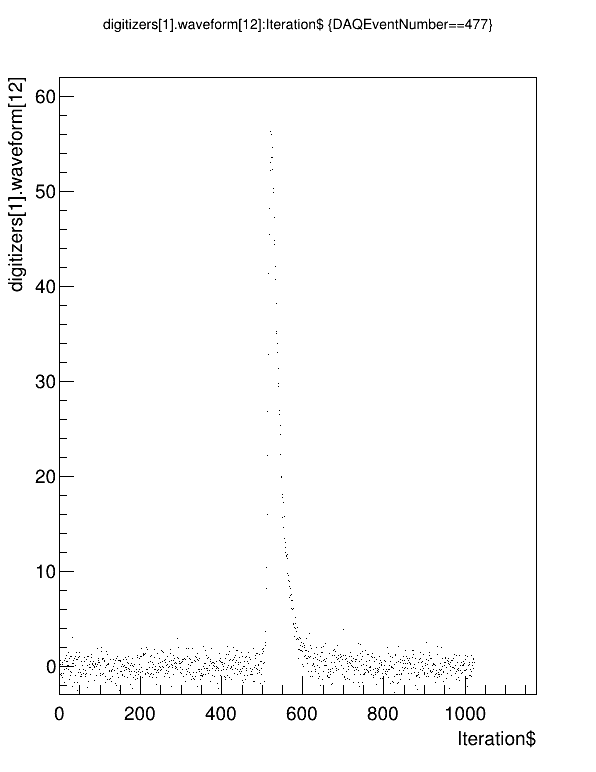

In [59]:
mytree.Draw("digitizers[1].waveform[12]:Iteration$", "DAQEventNumber==477")
c1.Draw()

In [51]:
fin = r.TFile.Open('../../../../../pulse_injection/test_pulseInjected.root')
mytree = fin.Get("Events")

mytree.Print()

******************************************************************************
*Tree    :Events    : Tree with digitizer waveform data                      *
*Entries :    59673 : Total =     19555848322 bytes  File  Size =  112323598 *
*        :          : Tree compression factor = 174.25                       *
******************************************************************************
*Br    0 :waveform  : waveform[5][16][1024]/F                                *
*Entries :59673 : Total  Size=19555368890 bytes  File Size  = 112202681 *
*Baskets :    17731 : Basket Size=    6400000 bytes  Compression= 174.28     *
*............................................................................*
*Br    1 :eventWeight : eventWeight/D                                        *
*Entries :    59673 : Total  Size=     479021 bytes  File Size  =      22182 *
*Baskets :       13 : Basket Size=      51200 bytes  Compression=  21.57     *
*........................................................

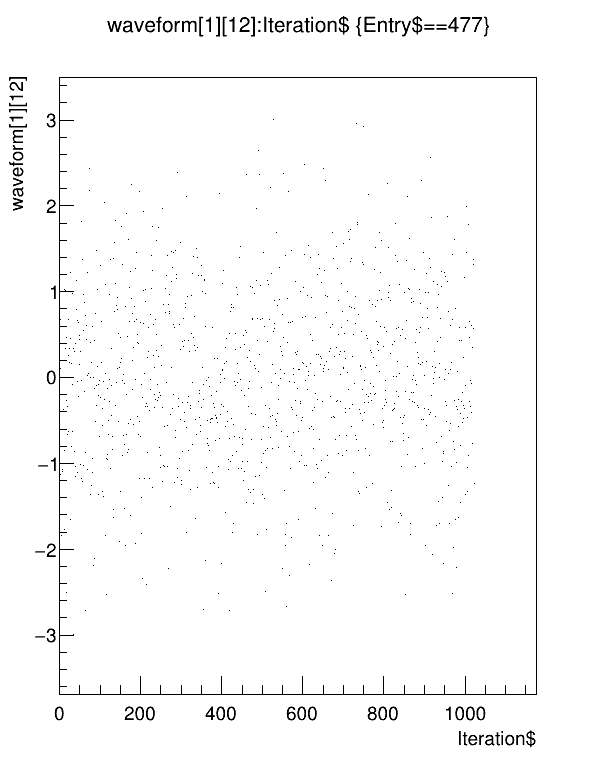

In [56]:
c1.Clear()
mytree.Draw("waveform[1][12]:Iteration$", "Entry$==477")
c1.Draw()

In [45]:
fin = r.TFile.Open('../../../../test.root')
mytree = fin.Get('t')

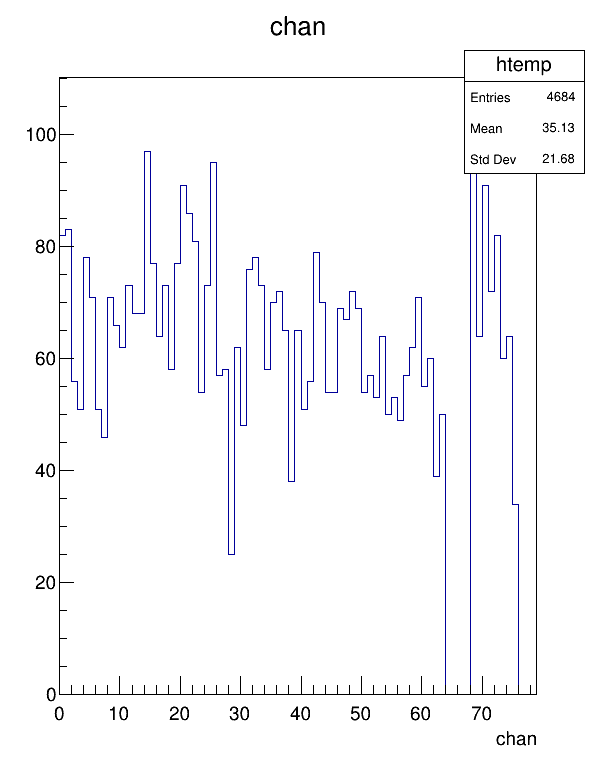

In [50]:
c1.Clear()
mytree.Draw("chan")
c1.Draw()

In [73]:
from array import array
c1 = r.TCanvas("c1", "c1", 800, 600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


 FCN=56.307 FROM MIGRAD    STATUS=CONVERGED      96 CALLS          97 TOTAL
                     EDM=2.84749e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.52164e+01   7.30087e+00   1.68999e-02  -4.42447e-05
   2  Mean         1.26070e+01   4.82444e-01   4.11249e-05  -1.04962e-02
   3  Sigma        5.82203e+00   4.66705e-01   3.87856e-05  -4.78430e-03
 FCN=49.122 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=7.00135e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.15917e+01   3.93497e+00   8.85193e-03  -1.69205e-05
   2  Mean         1.13992e+01   3.70131e-01   3.80989e-05  -3.36265e-02
   3  Sigma        5.25035e+00   4.

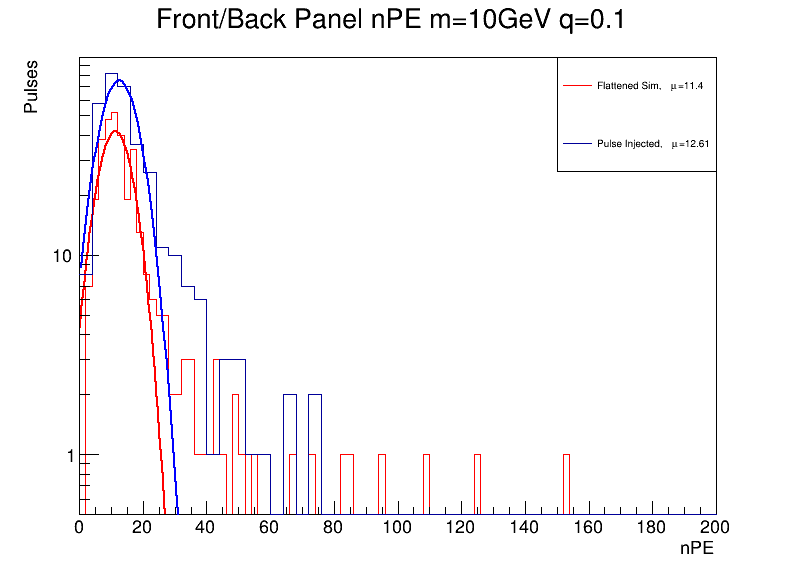

In [116]:
fin = r.TFile.Open('/data/user/mcarrigan/milliqan/pulseInjectedSim_v2/trees/MilliQan_m10p0_c0p1.root')
mytree = fin.Get('t')
mytree.Draw("area/4395.33>>h1(100, 0, 400)", 'type==1')

f_pulse = r.TF1('f_pulse', 'gaus')
f_pulse.SetLineColor(r.kBlue)
f_flat = r.TF1('f_flat', 'gaus')
f_flat.SetLineColor(r.kRed)

f_flat.SetParLimits(1, 0, 100)
f_pulse.SetParLimits(1, 0, 100)

h_pulse = r.gPad.GetPrimitive('h1')
h_pulse.Fit(f_pulse, '', '', 0, 100)

#fin.Close()

r.gStyle.SetOptStat(0)
flat = [8.0, 6.0, 13.0, 23.0, 12.0, 6.0, 5.0, 43.0, 23.0, 11.0, 9.0, 385.0, 387.0, 22.0, 31.0, 8.0, 7.0, 9.0, 3.0, 14.0, 7.0, 6.0, 14.0, 4.0, 16.0, 13.0, 26.0, 7.0, 14.0, 12.0, 4.0, 14.0, 18.0, 7.0, 6.0, 10.0, 24.0, 15.0, 11.0, 10.0, 2.0, 7.0, 2.0, 12.0, 6.0, 9.0, 10.0, 17.0, 36.0, 19.0, 10.0, 3.0, 11.0, 84.0, 32.0, 29.0, 10.0, 9.0, 9.0, 13.0, 13.0, 40.0, 72.0, 9.0, 12.0, 12.0, 8.0, 8.0, 14.0, 48.0, 9.0, 19.0, 26.0, 13.0, 8.0, 27.0, 12.0, 13.0, 9.0, 5.0, 12.0, 10.0, 17.0, 7.0, 8.0, 3.0, 16.0, 5.0, 32.0, 16.0, 8.0, 11.0, 12.0, 12.0, 19.0, 12.0, 11.0, 241.0, 7.0, 12.0, 16.0, 11.0, 10.0, 7.0, 19.0, 11.0, 5.0, 17.0, 9.0, 4.0, 6.0, 21.0, 8.0, 8.0, 16.0, 10.0, 13.0, 19.0, 10.0, 17.0, 11.0, 8.0, 7.0, 12.0, 8.0, 54.0, 23.0, 39.0, 14.0, 16.0, 11.0, 11.0, 19.0, 11.0, 17.0, 16.0, 6.0, 10.0, 11.0, 11.0, 5.0, 11.0, 16.0, 6.0, 8.0, 20.0, 16.0, 19.0, 20.0, 18.0, 7.0, 25.0, 17.0, 11.0, 13.0, 17.0, 11.0, 10.0, 8.0, 9.0, 35.0, 13.0, 13.0, 8.0, 16.0, 4.0, 3.0, 11.0, 9.0, 10.0, 13.0, 11.0, 10.0, 9.0, 14.0, 14.0, 8.0, 4.0, 34.0, 10.0, 10.0, 6.0, 9.0, 9.0, 9.0, 16.0, 20.0, 13.0, 17.0, 11.0, 20.0, 33.0, 8.0, 17.0, 12.0, 24.0, 20.0, 13.0, 67.0, 16.0, 15.0, 7.0, 10.0, 14.0, 6.0, 18.0, 11.0, 7.0, 5.0, 19.0, 50.0, 14.0, 17.0, 5.0, 5.0, 9.0, 10.0, 6.0, 12.0, 6.0, 4.0, 23.0, 13.0, 17.0, 24.0, 13.0, 8.0, 6.0, 7.0, 10.0, 10.0, 8.0, 12.0, 8.0, 16.0, 20.0, 34.0, 12.0, 13.0, 26.0, 7.0, 6.0, 17.0, 18.0, 15.0, 6.0, 26.0, 12.0, 8.0, 7.0, 7.0, 6.0, 12.0, 13.0, 9.0, 12.0, 31.0, 83.0, 3.0, 10.0, 12.0, 12.0, 48.0, 10.0, 9.0, 15.0, 15.0, 13.0, 7.0, 17.0, 9.0, 153.0, 124.0, 259.0, 109.0, 10.0, 10.0, 14.0, 43.0, 8.0, 20.0, 7.0, 17.0, 25.0, 7.0, 16.0, 9.0, 15.0, 15.0, 16.0, 43.0, 6.0, 9.0, 11.0, 10.0, 4.0, 23.0, 9.0, 14.0, 17.0, 17.0, 10.0, 11.0, 10.0, 8.0, 16.0, 11.0, 4.0, 11.0, 29.0, 19.0, 17.0, 9.0, 9.0, 16.0, 10.0, 12.0, 9.0, 10.0, 6.0, 5.0, 95.0, 9.0, 7.0, 4.0, 4.0, 45.0]
h_flat = r.TH1F("h_flat", 'Flattened Tree NPE', 100, 0, 200)

a_flat = array('d', flat)

h_flat.FillN(len(a_flat), a_flat, np.ones(len(a_flat)))
h_flat.Fit(f_flat, '', '', 0, 50)
h_flat.SetTitle('Front/Back Panel nPE m=10GeV q=0.1;nPE;Pulses')
#h_flat.GetYaxis().SetRangeUser(0.1, 100)
h_flat.Draw()
h_flat.SetLineColor(r.kRed)
h_pulse.Draw("same")

mean_flat = round(f_flat.GetParameter(1), 2)
mean_pulse = round(f_pulse.GetParameter(1), 2)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_flat, f'Flattened Sim, #mu={mean_flat}', 'l')
l1.AddEntry(h_pulse, f'Pulse Injected, #mu={mean_pulse}', 'l')
l1.Draw()
c1.Draw()
c1.SetLogy()

Warning in <TFile::Append>: Replacing existing TH1: h_flat (Potential memory leak).


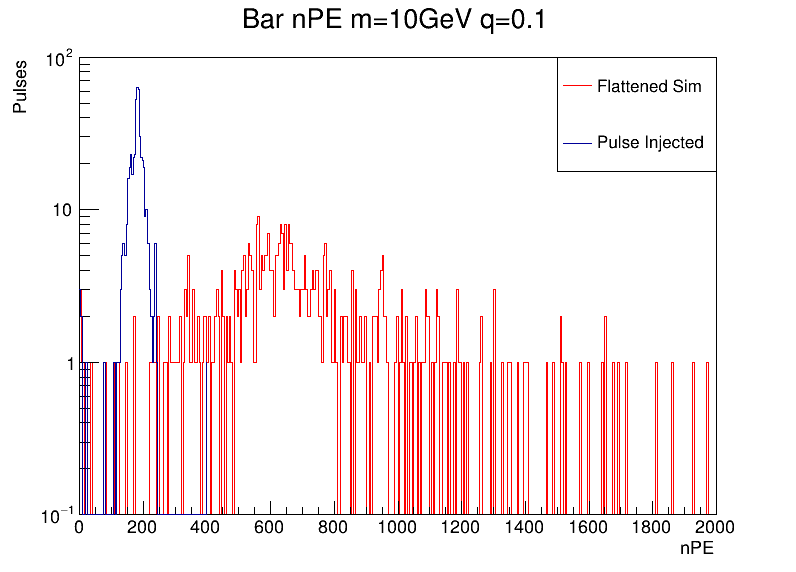

In [102]:
mytree.Draw("nPE>>h1(100, 0, 400)", 'type==0')

h_pulse = r.gPad.GetPrimitive('h1')

flat = [927.0, 952.0, 648.0, 512.0, 222.0, 510.0, 659.0, 564.0, 1.0, 1654.0, 2193.0, 1928.0, 2059.0, 391.0, 502.0, 561.0, 436.0, 580.0, 869.0, 498.0, 592.0, 879.0, 1348.0, 950.0, 1188.0, 282.0, 571.0, 779.0, 510.0, 590.0, 663.0, 772.0, 780.0, 1059.0, 628.0, 529.0, 718.0, 709.0, 631.0, 540.0, 635.0, 341.0, 374.0, 593.0, 743.0, 432.0, 948.0, 461.0, 779.0, 768.0, 728.0, 658.0, 589.0, 446.0, 149.0, 789.0, 749.0, 833.0, 635.0, 1377.0, 617.0, 603.0, 823.0, 1097.0, 1146.0, 640.0, 488.0, 525.0, 766.0, 722.0, 672.0, 678.0, 587.0, 635.0, 591.0, 951.0, 540.0, 734.0, 84.0, 426.0, 1037.0, 401.0, 345.0, 1642.0, 945.0, 1051.0, 427.0, 10.0, 2.0, 3561.0, 2828.0, 963.0, 330.0, 658.0, 635.0, 667.0, 756.0, 575.0, 690.0, 953.0, 536.0, 1351.0, 1570.0, 1396.0, 1864.0, 559.0, 797.0, 366.0, 334.0, 642.0, 344.0, 536.0, 867.0, 408.0, 498.0, 491.0, 846.0, 171.0, 716.0, 636.0, 597.0, 712.0, 314.0, 787.0, 765.0, 502.0, 652.0, 773.0, 771.0, 623.0, 1085.0, 296.0, 492.0, 666.0, 930.0, 447.0, 570.0, 38.0, 562.0, 226.0, 433.0, 655.0, 645.0, 757.0, 934.0, 624.0, 836.0, 1465.0, 684.0, 693.0, 608.0, 576.0, 1117.0, 746.0, 622.0, 340.0, 580.0, 1190.0, 604.0, 786.0, 447.0, 1293.0, 1487.0, 2.0, 661.0, 655.0, 566.0, 542.0, 601.0, 684.0, 645.0, 407.0, 658.0, 559.0, 634.0, 936.0, 913.0, 653.0, 804.0, 1123.0, 1514.0, 1197.0, 1262.0, 238.0, 595.0, 613.0, 659.0, 668.0, 378.0, 808.0, 954.0, 832.0, 635.0, 899.0, 617.0, 1056.0, 883.0, 749.0, 509.0, 615.0, 586.0, 743.0, 676.0, 486.0, 3641.0, 3677.0, 3194.0, 3475.0, 707.0, 502.0, 563.0, 567.0, 627.0, 884.0, 1066.0, 1153.0, 949.0, 615.0, 668.0, 686.0, 454.0, 1255.0, 293.0, 393.0, 870.0, 558.0, 606.0, 398.0, 1301.0, 698.0, 736.0, 624.0, 1028.0, 666.0, 856.0, 645.0, 645.0, 579.0, 593.0, 676.0, 353.0, 454.0, 530.0, 343.0, 423.0, 356.0, 650.0, 592.0, 604.0, 246.0, 583.0, 627.0, 630.0, 478.0, 595.0, 1087.0, 1120.0, 731.0, 645.0, 1016.0, 303.0, 532.0, 123.0, 398.0, 416.0, 566.0, 762.0, 337.0, 747.0, 784.0, 519.0, 572.0, 791.0, 650.0, 859.0, 629.0, 591.0, 542.0, 554.0, 1029.0, 1161.0, 929.0, 1179.0, 372.0, 867.0, 940.0, 700.0, 530.0, 730.0, 627.0, 1092.0, 486.0, 920.0, 859.0, 800.0, 581.0, 899.0, 828.0, 463.0, 317.0, 562.0, 699.0, 664.0, 1127.0, 956.0, 1078.0, 941.0, 821.0, 432.0, 559.0, 521.0, 1012.0, 1187.0, 940.0, 1010.0, 489.0, 672.0, 859.0, 562.0, 514.0, 564.0, 361.0, 1206.0, 750.0, 492.0, 474.0, 108.0, 631.0, 563.0, 662.0, 557.0, 702.0, 5.0, 837.0, 537.0, 646.0, 466.0, 1014.0, 1304.0, 1188.0, 1040.0, 266.0, 515.0, 637.0, 528.0, 633.0, 1006.0, 341.0, 893.0, 1679.0, 1120.0, 607.0, 725.0, 327.0, 664.0, 633.0, 517.0, 632.0, 688.0, 1125.0, 768.0, 686.0, 2550.0, 1813.0, 1970.0, 1518.0, 583.0, 800.0, 536.0, 696.0, 555.0, 3800.0, 563.0, 3768.0, 3431.0, 3878.0, 4135.0, 520.0, 1108.0, 274.0, 357.0, 518.0, 840.0, 771.0, 886.0, 1092.0, 968.0, 1302.0, 1216.0, 246.0, 958.0, 995.0, 998.0, 2478.0, 945.0, 1140.0, 1082.0, 785.0, 704.0, 741.0, 620.0, 1095.0, 355.0, 707.0, 771.0, 595.0, 1595.0, 1650.0, 1514.0, 1261.0, 2040.0, 2204.0, 2003.0, 1525.0, 585.0, 607.0, 710.0, 534.0, 751.0, 666.0, 574.0, 578.0, 640.0, 305.0, 659.0, 990.0, 585.0, 1326.0, 627.0, 518.0, 711.0, 661.0, 119.0, 173.0, 683.0, 647.0, 731.0, 2016.0, 769.0, 614.0, 556.0, 1089.0, 332.0, 533.0, 725.0, 706.0, 960.0, 673.0, 784.0, 772.0, 573.0, 539.0, 1694.0, 1406.0, 1400.0, 1717.0, 744.0, 533.0, 283.0, 707.0, 337.0, 436.0, 618.0, 673.0, 234.0, 555.0, 920.0, 736.0, 633.0, 473.0, 735.0, 286.0, 446.0, 319.0, 549.0, 724.0, 386.0]

h_flat = r.TH1F("h_flat", 'Flattened Tree NPE', 400, 0, 2000)

a_flat = array('d', flat)

h_flat.FillN(len(a_flat), a_flat, np.ones(len(a_flat)))

h_flat.SetTitle('Bar nPE m=10GeV q=0.1;nPE;Pulses')
h_flat.GetYaxis().SetRangeUser(0.1, 100)
h_flat.Draw()
h_flat.SetLineColor(r.kRed)
h_pulse.Draw("same")

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_flat, 'Flattened Sim', 'l')
l1.AddEntry(h_pulse, 'Pulse Injected', 'l')
l1.Draw()
c1.Draw()
c1.SetLogy()

AttributeError: 'CPyCppyy_NoneType' object has no attribute 'Draw'